# Using Word Embedding on IMDB Dataset

In [1]:
# word embedding = (one hot encoding jesa hota hai but light hota hai choete size hota hai low dimention hota 
#                   hai dense hota hai) isko data ke through learn karainge jb ohc data ke through learn nahe hota
#                   256,512,1024 size hota hai word embedding ka
# jo word samonians honge meaning same honge jese watch clock woh kareb kareb vector honge.
# 

# vectorization types:
 # a, one hot 
 # b, embedding : 1. traing karai khud or 2. pretrained embading use kersakte hai
 # c, ngrams approch

In [2]:
# EMBEDDING  > vector
# rnn        > feature extraction
# dence      > Classification

In [3]:
# back propogation = weight ubdate kerta hai revece mai

In [4]:
import numpy as np
from tensorflow.keras.layers import Embedding

In [5]:
max_features = 10000   # most common word
maxlen = 20            # 20 word ka sentence hoga max

from tensorflow.keras.datasets import imdb
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

In [6]:
# pad_sequences is used to ensure that all sequences in a list have the same length.
from tensorflow.keras import preprocessing
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen)) # 10000 sentences, 8 length # word embedding ?
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 8)             80000     
_________________________________________________________________
flatten (Flatten)            (None, 160)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 4s 207us/sample - loss: 0.6726 - acc: 0.6115 - val_loss: 0.6288 - val_acc: 0.6860
Epoch 2/10
20000/20000 [==============================] - 3s 166us/sample - loss: 0.5512 - acc: 0.7478 - val_loss: 0.5329 - val_acc: 0.7304
Epoch 3/10
20000/20000 [==============================] - 3s 161us/sample - loss: 0.4655 - acc: 0.7889 - val_loss: 0.5030 - val_acc: 0.7502
Epoch 4/10
20000/20000 [==============================] - 3s 152us/sample - loss: 0.4224 - acc: 0.8090 - val_loss: 0.4943 - val_acc: 0.7518
Epoch 5/10
20000/20000 [==============================] - 3s 156us/sample - loss: 0.3926 - acc: 0.8256 - val_loss: 0.4949 - val_acc: 0.7540
Epoch 6/10
20000/20000 [==============================] - 3s 154us/sample - loss: 0.3684 - acc: 0.8404 - val_loss: 0.4973 - val_acc: 0.7584
Epoch 7/10
20000/20000 [==============================] - 3s 150us/sample - loss: 0.3460 - acc: 0.8513 - val_lo

It’s much better to add recurrent layers or 1D convolutional layers on top of the embedded sequences to learn features that take into account each sequence as a whole.
That’s what we’ll focus on in the next few sections. 

# Download Imdb data from
 http://mng.bz/0tIo

let’s collect the individual training reviews into a list of strings, one string per
review. We’ll also collect the review labels (positive/negative) into a labels list. 

# Processing the labels of the raw IMDB data

In [9]:
import os
imdb_dir = 'aclImdb'
train_dir = os.path.join(imdb_dir, 'train')
labels = []
texts = []
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)

    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname),encoding="utf8")
            texts.append(f.read())
            f.close()
        if label_type == 'neg':
            labels.append(0)
        else:
            labels.append(1)

In [10]:
#texts

In [11]:
#labels

# Tokenizing the text of the raw IMDB data

In [12]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100               # Cuts off reviews after 100 words
training_samples = 200     # Trains on 200 samples
validation_samples = 10000 # Validates on 10,000 samples
max_words = 10000          # Considers only the top 10,000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
#sequences

In [13]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 88582 unique tokens.


In [14]:
# pad_sequences is used to ensure that all sequences in a list have the same length.
from tensorflow.keras.preprocessing.sequence import pad_sequences
data = pad_sequences(sequences, maxlen=maxlen)
#data

In [15]:
labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


Splits the data into a training set and a
validation set, but first shuffles the data,
because you’re starting with data in which
samples are ordered (all negative first, then
all positive) 

In [16]:
indices = np.arange(data.shape[0])   # ?
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

In [17]:
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

# DOWNLOADING THE GLOVE WORD EMBEDDINGS
https://nlp.stanford.edu/projects/glove

It’s an 822 MB zip file called glove.6B.zip,
containing 100-dimensional embedding vectors for 400,000 words (or nonword
tokens).

PREPROCESSING THE EMBEDDINGS
Let’s parse the unzipped file (a .txt file) to build an index that maps words (as strings)
to their vector representation (as number vectors).

# Parsing the GloVe word-embeddings file

In [18]:
glove_dir = 'glove.6B'                                                   # ?
embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'),encoding="utf8")

for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


Next, you’ll build an embedding matrix that you can load into an Embedding layer. It
must be a matrix of shape (max_words, embedding_dim), where each entry i contains
the embedding_dim-dimensional vector for the word of index i in the reference word
index (built during tokenization). Note that index 0 isn’t supposed to stand for any
word or token—it’s a placeholder.

# Listing 6.11 Preparing the GloVe word-embeddings matrix

In [19]:
embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [20]:
#  same model architecture as before

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


# Listing 6.13 Loading pretrained word embeddings into the Embedding layer

In [22]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

Additionally, you’ll freeze the Embedding layer (set its trainable attribute to False),
following the same rationale you’re already familiar with in the context of pretrained
convnet features: when parts of a model are pretrained (like your Embedding layer)
and parts are randomly initialized (like your classifier), the pretrained parts shouldn’t
be updated during training, to avoid forgetting what they already know. The large gradient updates triggered by the randomly initialized layers would be disruptive to the
already-learned features. 

# Listing 6.14 Training and evaluation

In [23]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

model.save_weights('pre_trained_glove_model.h5')

Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 3s 13ms/sample - loss: 1.4733 - acc: 0.4350 - val_loss: 0.6931 - val_acc: 0.4956
Epoch 2/10
200/200 [==============================] - 2s 10ms/sample - loss: 0.6396 - acc: 0.5900 - val_loss: 0.8180 - val_acc: 0.4975
Epoch 3/10
200/200 [==============================] - 2s 9ms/sample - loss: 0.4558 - acc: 0.8000 - val_loss: 0.8037 - val_acc: 0.5144
Epoch 4/10
200/200 [==============================] - 2s 9ms/sample - loss: 0.5474 - acc: 0.7250 - val_loss: 0.7078 - val_acc: 0.5509
Epoch 5/10
200/200 [==============================] - 2s 9ms/sample - loss: 0.1631 - acc: 0.9850 - val_loss: 1.0817 - val_acc: 0.4999
Epoch 6/10
200/200 [==============================] - 2s 9ms/sample - loss: 0.2324 - acc: 0.8900 - val_loss: 1.0734 - val_acc: 0.5171
Epoch 7/10
200/200 [==============================] - 2s 9ms/sample - loss: 0.0998 - acc: 0.9800 - val_loss: 0.7935 - val_acc: 0.5477
Epoch 8/10
2

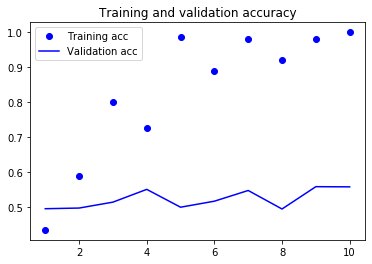

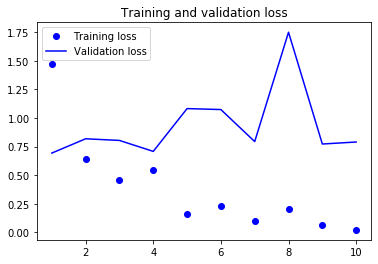

In [24]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

The model quickly starts overfitting, which is unsurprising given the small number of
training samples. Validation accuracy has high variance for the same reason, but it
seems to reach the high 50s.

# Listing 6.16 Training the same model without pretrained word embeddings

 You can also train the same model without loading the pretrained word embeddings and without freezing the embedding layer. In that case, you’ll learn a taskspecific embedding of the input tokens, which is generally more powerful than
pretrained word embeddings when lots of data is available. But in this case, you have
only 200 training samples.

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 3s 13ms/sample - loss: 0.7007 - acc: 0.4350 - val_loss: 0.6921 - val_acc: 0.5207
Epoch 2/10
200/200 [==============================] - 2s 9m

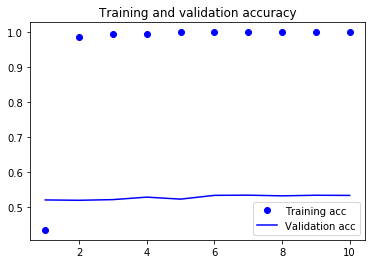

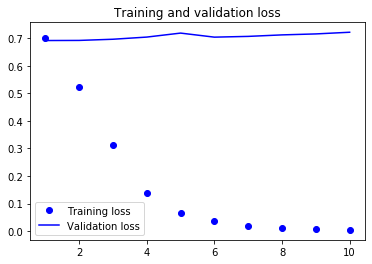

In [26]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Validation accuracy stalls in the low 50s. So in this case, pretrained word embeddings
outperform jointly learned embeddings. If you increase the number of training samples, this will quickly stop being the case—try it as an exercise.
 Finally, let’s evaluate the model on the test data. First, you need to tokenize the test
data.

# Listing 6.17 Tokenizing the data of the test set

In [27]:
# ph.No:194